<a href="https://colab.research.google.com/github/pujaramesh/quantum-machine-learning-tasks-lab/blob/main/tas9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane qiskit qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 458.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.4 MB/s eta 0:00:00


**task9**


--- Feature Map Circuit ---
0: ──H──RZ(5.70)─╭●────────────╭●───────────────────────────────╭●────────────╭●────────────── ···
1: ──────────────╰X──RZ(16.53)─╰X─╭●────────────╭●──H──RZ(2.90)─╰X──RZ(16.53)─╰X─╭●─────────── ···
2: ───────────────────────────────╰X──RZ(12.18)─╰X─╭●───────────╭●───────────────╰X──RZ(12.18) ···
3: ────────────────────────────────────────────────╰X──RZ(5.46)─╰X──────────────────────────── ···

0: ··· ────╭●────────────╭●───────────────────────────────╭●────────────╭●──────────────────── ···
1: ··· ─╭●─╰X──RZ(16.53)─╰X──────────────╭●────────────╭●─╰X──RZ(16.53)─╰X─╭●────────────╭●─── ···
2: ··· ─╰X─╭●────────────╭●──H──RZ(4.20)─╰X──RZ(12.18)─╰X─╭●────────────╭●─╰X──RZ(12.18)─╰X─╭● ···
3: ··· ────╰X──RZ(5.46)──╰X───────────────────────────────╰X──RZ(5.46)──╰X──H──RZ(1.30)─────╰X ···

0: ··· ──────────────┤  State
1: ··· ──────────────┤  State
2: ··· ───────────╭●─┤  State
3: ··· ──RZ(5.46)─╰X─┤  State

--- Kernel Circuit ---
0: ──H──RZ(5.70)─╭●────────────╭●

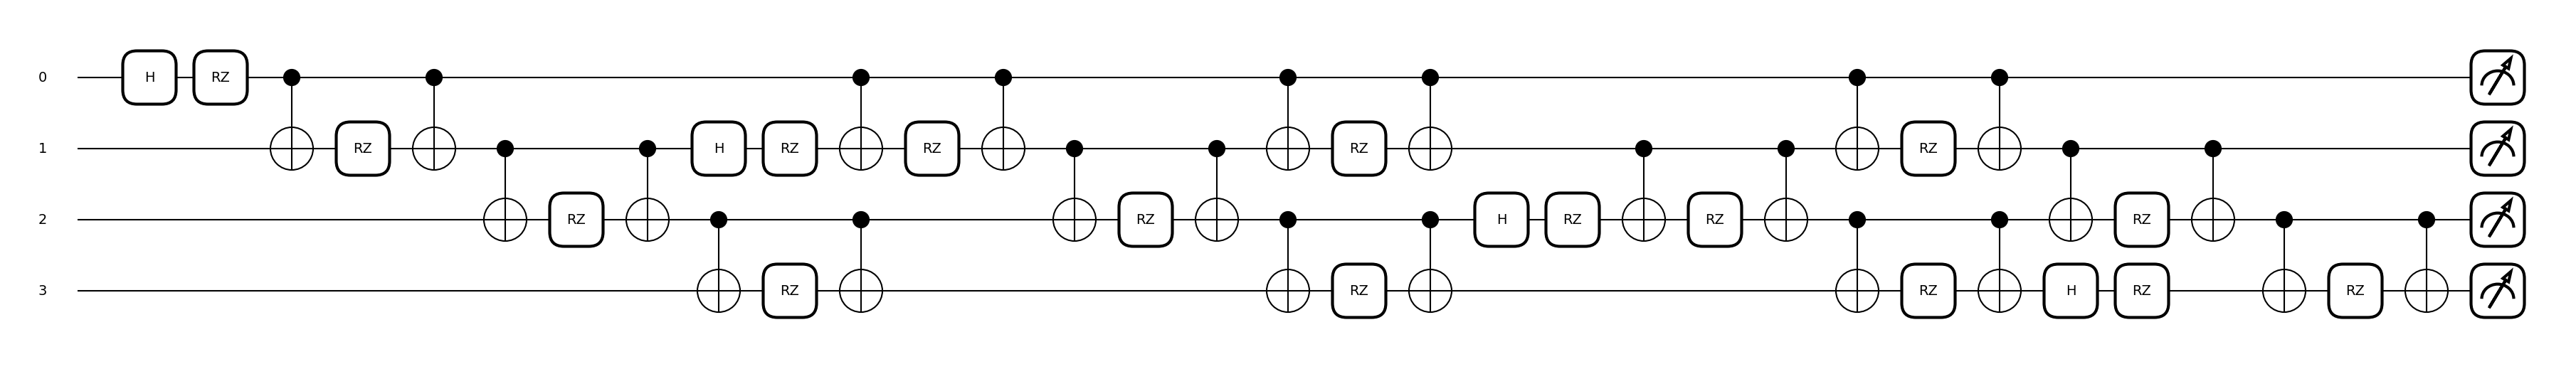


--- Kernel Circuit ---


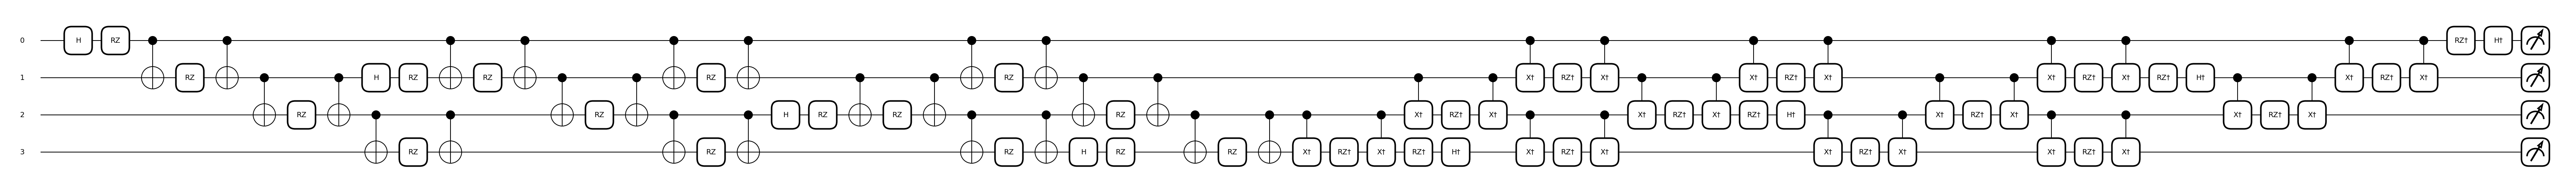


Confusion Matrix
[[14  5  0]
 [ 1 11  3]
 [ 1  7  8]]

Classification Report


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
#!pip install seaborn
#!pip install -U scikit-learn
#!pip install qiskit-algorithms
#!pip install qiskit-machine-learning
#!pip install pylatexenc
!pip install pennylane
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# -------------------------------
# Load Iris dataset
# -------------------------------
iris_file_path = "/content/iris.csv"

# Check if the file exists
if not os.path.exists(iris_file_path):
    print(f"Error: Iris dataset not found at {iris_file_path}")
    print("Please upload the 'iris.csv' file to the '/content/' directory.")
else:
    # Read the CSV without a header and assign column names
    column_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
    df_iris = pd.read_csv(iris_file_path, header=None, names=column_names)

    # Ensure the target column is integer type before encoding
    df_iris['target'] = df_iris['target'].astype(str) # Convert to string first to handle mixed types if any
    # Map the string target values to integers
    target_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    df_iris['target'] = df_iris['target'].map(target_map)


    X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
    y = df_iris['target'].values.astype(int)


    # Encode labels into integers (already done by mapping, but keeping for consistency if needed)
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y_encoded,
    test_size=0.33, random_state=42)
    # -------------------------------
    # Define Quantum Feature Map
    # -------------------------------
    n_qubits = 4
    dev = qml.device("default.qubit", wires=n_qubits)

    def feature_map(x):
     """Embedding classical features into quantum states"""
     for i in range(n_qubits):
      qml.Hadamard(wires=i)
      qml.RZ(x[i], wires=i)
      # Add entanglement (similar to ZZFeatureMap)
      for i in range(n_qubits - 1):
       qml.CNOT(wires=[i, i+1])
       qml.RZ((x[i] * x[i+1]), wires=i+1)
       qml.CNOT(wires=[i, i+1])

    # Kernel evaluation circuit
    @qml.qnode(dev)
    def kernel_circuit(x1, x2):
     feature_map(x1)
     qml.adjoint(feature_map)(x2)
     return qml.probs(wires=range(n_qubits))

    # -------------------------------
    # Display Quantum Circuits
    # -------------------------------
    sample_x = x_train[0]
    sample_y = x_train[1]

    # Draw feature map circuit
    @qml.qnode(dev)
    def feature_map_circuit(x):
     feature_map(x)
     return qml.state()

    print("\n--- Feature Map Circuit ---")
    print(qml.draw(feature_map_circuit)(sample_x))

    # Draw kernel circuit
    print("\n--- Kernel Circuit ---")
    print(qml.draw(kernel_circuit)(sample_x, sample_y))

    # Optional: matplotlib visualization
    # Draw feature map circuit
    print("\n--- Feature Map Circuit ---")
    fig, ax = qml.draw_mpl(feature_map_circuit)(sample_x)
    plt.show()

    # Draw kernel circuit
    print("\n--- Kernel Circuit ---")
    fig, ax = qml.draw_mpl(kernel_circuit)(sample_x, sample_y)
    plt.show()

    # -------------------------------
    # Construct Gram (Kernel) Matrices
    # -------------------------------
    def kernel(x1, x2):
     """Return fidelity between |Φ(x1)> and |Φ(x2)>"""
     return kernel_circuit(x1, x2)[0]

    def compute_kernel_matrix(X1, X2):
     K = np.zeros((len(X1), len(X2)))
     for i, x1 in enumerate(X1):
      for j, x2 in enumerate(X2):
       K[i, j] = kernel(x1, x2)
     return K

    K_train = compute_kernel_matrix(x_train, x_train)
    K_test = compute_kernel_matrix(x_test, x_train)

    # -------------------------------
    # Train QSVM
    # -------------------------------
    qsvm_model = SVC(kernel="precomputed")
    qsvm_model.fit(K_train, y_train)

    # Predictions
    y_pred = qsvm_model.predict(K_test)

    print("\nConfusion Matrix")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report")
    # Use the string labels from target_map keys for target_names
    print(classification_report(y_test, y_pred,
    target_names=list(target_map.keys())))

    # -------------------------------
    # Test on a new input
    # -------------------------------
    new_point = np.array([[4.4, 4.4, 4.4, 4.4]])
    K_new = compute_kernel_matrix(new_point, x_train)
    pred_label = qsvm_model.predict(K_new)

    print("Predicted flower type for (4.4, 4.4, 4.4, 4.4):",
    encoder.inverse_transform(pred_label)[0])

In [ ]:
import pandas as pd

iris_file_path = "/content/iris.csv"

try:
    df_iris_check = pd.read_csv(iris_file_path)
    print("Columns in the loaded DataFrame:")
    print(df_iris_check.columns)
    print("\nHead of the DataFrame:")
    display(df_iris_check.head())
except FileNotFoundError:
    print(f"Error: Iris dataset not found at {iris_file_path}")

Columns in the loaded DataFrame:
Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

Head of the DataFrame:


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**task10**

In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.0 MB/s eta 0:00:00
